[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/08_Dropout_Classification_Fashion_MNIST.ipynb)

# Dropout Compare by Using Fashion-MNIST dataset for classification

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.layers import Activation

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical

import tensorflow as tf
import multiprocessing as mp

from keras.datasets import fashion_mnist

Using TensorFlow backend.


## 1. Data prepocessing 

In [0]:
batch_size = 128
num_classes = 10
epochs = 100

In [5]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
num_classes = 10
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
Y_train = to_categorical(Y_train,num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

### Building a CNN with 6 Layers

In [0]:
dropouts = [0.0,0.1,0.2,0.3,0.5]

In [0]:
def model(dropout):
 
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', activation='relu',input_shape=X_train.shape[1:])) 
  #model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout))
    
  #model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout))
  
  #model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))
  
  #model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))
 
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  
  return model

### For the Dropout = 0

In [10]:
start = time.time()
model_1 = model(dropouts[0])
model_1_history=model_1.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test),shuffle=True)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.5489 - acc: 0.7935 - val_loss: 0.3505 - val_acc: 0.8720
Epoch 2/100
60000/60000 [==============================] - 11s 175us/step - loss: 0.3101 - acc: 0.8862 - val_loss: 0.3568 - val_acc: 0.8722
Epoch 3/100
23936/60000 [==========>...................] - ETA: 6s - loss: 0.2642 - acc: 0.9005

60000/60000 [==============================] - 10s 174us/step - loss: 0.2587 - acc: 0.9045 - val_loss: 0.2834 - val_acc: 0.8972
Epoch 4/100
60000/60000 [==============================] - 10s 172us/step - loss: 0.2245 - acc: 0.9161 - val_loss: 0.2600 - val_acc: 0.9063
Epoch 5/100
59264/60000 [============================>.] - ETA: 0s - loss: 0.2002 - acc: 0.9257

60000/60000 [==============================] - 10s 172us/step - loss: 0.2003 - acc: 0.9258 - val_loss: 0.2324 - val_acc: 0.9170
Epoch 6/100
60000/60000 [==============================] - 10s 171us/step - loss: 0.1783 - acc: 0.9336 - val_loss: 0.2330 - val_acc: 0.9161
Epoch 7/100
60000/60000 [==============================] - 10s 167us/step - loss: 0.1604 - acc: 0.9402 - val_loss: 0.2265 - val_acc: 0.9192
Epoch 8/100
 4352/60000 [=>............................] - ETA: 8s - loss: 0.1336 - acc: 0.9511

60000/60000 [==============================] - 10s 166us/step - loss: 0.1431 - acc: 0.9463 - val_loss: 0.2445 - val_acc: 0.9127
Epoch 9/100
60000/60000 [==============================] - 10s 167us/step - loss: 0.1286 - acc: 0.9518 - val_loss: 0.2533 - val_acc: 0.9179
Epoch 10/100
54656/60000 [==========================>...] - ETA: 0s - loss: 0.1119 - acc: 0.9579

60000/60000 [==============================] - 10s 167us/step - loss: 0.1126 - acc: 0.9575 - val_loss: 0.2544 - val_acc: 0.9217
Epoch 11/100
60000/60000 [==============================] - 10s 169us/step - loss: 0.1015 - acc: 0.9615 - val_loss: 0.3005 - val_acc: 0.9150
Epoch 12/100
60000/60000 [==============================] - 10s 172us/step - loss: 0.0900 - acc: 0.9662 - val_loss: 0.2808 - val_acc: 0.9197
Epoch 13/100
 3200/60000 [>.............................] - ETA: 9s - loss: 0.0790 - acc: 0.9694

60000/60000 [==============================] - 10s 171us/step - loss: 0.0790 - acc: 0.9706 - val_loss: 0.2929 - val_acc: 0.9175
Epoch 14/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.0772 - acc: 0.9715 - val_loss: 0.3126 - val_acc: 0.9224
Epoch 15/100
54272/60000 [==========================>...] - ETA: 0s - loss: 0.0638 - acc: 0.9755

60000/60000 [==============================] - 10s 168us/step - loss: 0.0637 - acc: 0.9757 - val_loss: 0.3188 - val_acc: 0.9201
Epoch 16/100
60000/60000 [==============================] - 10s 167us/step - loss: 0.0577 - acc: 0.9781 - val_loss: 0.3406 - val_acc: 0.9183
Epoch 17/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.0518 - acc: 0.9801 - val_loss: 0.3875 - val_acc: 0.9120
Epoch 18/100
 3584/60000 [>.............................] - ETA: 8s - loss: 0.0515 - acc: 0.9788

60000/60000 [==============================] - 10s 167us/step - loss: 0.0463 - acc: 0.9822 - val_loss: 0.3902 - val_acc: 0.9149
Epoch 19/100
60000/60000 [==============================] - 10s 165us/step - loss: 0.0450 - acc: 0.9837 - val_loss: 0.3779 - val_acc: 0.9188
Epoch 20/100
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0396 - acc: 0.9855

60000/60000 [==============================] - 10s 162us/step - loss: 0.0401 - acc: 0.9853 - val_loss: 0.4081 - val_acc: 0.9170
Epoch 21/100
60000/60000 [==============================] - 10s 164us/step - loss: 0.0336 - acc: 0.9879 - val_loss: 0.4188 - val_acc: 0.9181
Epoch 22/100
60000/60000 [==============================] - 10s 164us/step - loss: 0.0363 - acc: 0.9872 - val_loss: 0.4168 - val_acc: 0.9094
Epoch 23/100
 3968/60000 [>.............................] - ETA: 9s - loss: 0.0324 - acc: 0.9871

60000/60000 [==============================] - 10s 167us/step - loss: 0.0345 - acc: 0.9872 - val_loss: 0.4140 - val_acc: 0.9196
Epoch 24/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.0339 - acc: 0.9882 - val_loss: 0.4524 - val_acc: 0.9144
Epoch 25/100
54528/60000 [==========================>...] - ETA: 0s - loss: 0.0274 - acc: 0.9896

60000/60000 [==============================] - 10s 164us/step - loss: 0.0277 - acc: 0.9894 - val_loss: 0.4439 - val_acc: 0.9141
Epoch 26/100
60000/60000 [==============================] - 10s 166us/step - loss: 0.0295 - acc: 0.9892 - val_loss: 0.4419 - val_acc: 0.9159
Epoch 27/100
60000/60000 [==============================] - 10s 166us/step - loss: 0.0281 - acc: 0.9903 - val_loss: 0.4471 - val_acc: 0.9166
Epoch 28/100
 3584/60000 [>.............................] - ETA: 8s - loss: 0.0131 - acc: 0.9953

60000/60000 [==============================] - 10s 165us/step - loss: 0.0241 - acc: 0.9914 - val_loss: 0.4568 - val_acc: 0.9208
Epoch 29/100
60000/60000 [==============================] - 10s 165us/step - loss: 0.0241 - acc: 0.9916 - val_loss: 0.4440 - val_acc: 0.9196
Epoch 30/100
54144/60000 [==========================>...] - ETA: 0s - loss: 0.0253 - acc: 0.9915

60000/60000 [==============================] - 10s 164us/step - loss: 0.0242 - acc: 0.9917 - val_loss: 0.4755 - val_acc: 0.9234
Epoch 31/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0226 - acc: 0.9921 - val_loss: 0.4438 - val_acc: 0.9203
Epoch 32/100
60000/60000 [==============================] - 10s 165us/step - loss: 0.0215 - acc: 0.9924 - val_loss: 0.4331 - val_acc: 0.9193
Epoch 33/100
 3968/60000 [>.............................] - ETA: 8s - loss: 0.0252 - acc: 0.9902

60000/60000 [==============================] - 10s 168us/step - loss: 0.0210 - acc: 0.9926 - val_loss: 0.5013 - val_acc: 0.9192
Epoch 34/100
60000/60000 [==============================] - 10s 165us/step - loss: 0.0178 - acc: 0.9938 - val_loss: 0.4693 - val_acc: 0.9191
Epoch 35/100
54272/60000 [==========================>...] - ETA: 0s - loss: 0.0203 - acc: 0.9928

60000/60000 [==============================] - 10s 163us/step - loss: 0.0201 - acc: 0.9928 - val_loss: 0.4446 - val_acc: 0.9223
Epoch 36/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0200 - acc: 0.9932 - val_loss: 0.4857 - val_acc: 0.9171
Epoch 37/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0207 - acc: 0.9930 - val_loss: 0.4564 - val_acc: 0.9184
Epoch 38/100
 3968/60000 [>.............................] - ETA: 8s - loss: 0.0141 - acc: 0.9952

60000/60000 [==============================] - 10s 162us/step - loss: 0.0187 - acc: 0.9937 - val_loss: 0.4958 - val_acc: 0.9202
Epoch 39/100
60000/60000 [==============================] - 10s 164us/step - loss: 0.0183 - acc: 0.9936 - val_loss: 0.4836 - val_acc: 0.9201
Epoch 40/100
54400/60000 [==========================>...] - ETA: 0s - loss: 0.0152 - acc: 0.9951

60000/60000 [==============================] - 10s 168us/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.5274 - val_acc: 0.9131
Epoch 41/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.0181 - acc: 0.9939 - val_loss: 0.5429 - val_acc: 0.9161
Epoch 42/100
60000/60000 [==============================] - 10s 166us/step - loss: 0.0170 - acc: 0.9944 - val_loss: 0.5308 - val_acc: 0.9200
Epoch 43/100
 3584/60000 [>.............................] - ETA: 9s - loss: 0.0098 - acc: 0.9967

60000/60000 [==============================] - 10s 166us/step - loss: 0.0132 - acc: 0.9957 - val_loss: 0.5705 - val_acc: 0.9151
Epoch 44/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0194 - acc: 0.9940 - val_loss: 0.4720 - val_acc: 0.9203
Epoch 45/100
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0156 - acc: 0.9948

60000/60000 [==============================] - 10s 164us/step - loss: 0.0157 - acc: 0.9946 - val_loss: 0.4849 - val_acc: 0.9207
Epoch 46/100
60000/60000 [==============================] - 10s 164us/step - loss: 0.0163 - acc: 0.9945 - val_loss: 0.5608 - val_acc: 0.9160
Epoch 47/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0159 - acc: 0.9953 - val_loss: 0.4800 - val_acc: 0.9214
Epoch 48/100
 4352/60000 [=>............................] - ETA: 8s - loss: 0.0123 - acc: 0.9956

60000/60000 [==============================] - 10s 163us/step - loss: 0.0163 - acc: 0.9945 - val_loss: 0.4881 - val_acc: 0.9206
Epoch 49/100
60000/60000 [==============================] - 10s 164us/step - loss: 0.0161 - acc: 0.9946 - val_loss: 0.5285 - val_acc: 0.9215
Epoch 50/100
54528/60000 [==========================>...] - ETA: 0s - loss: 0.0152 - acc: 0.9951

60000/60000 [==============================] - 10s 165us/step - loss: 0.0146 - acc: 0.9952 - val_loss: 0.5419 - val_acc: 0.9203
Epoch 51/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0149 - acc: 0.9954 - val_loss: 0.5528 - val_acc: 0.9189
Epoch 52/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0131 - acc: 0.9955 - val_loss: 0.5380 - val_acc: 0.9202
Epoch 53/100
 3968/60000 [>.............................] - ETA: 8s - loss: 0.0146 - acc: 0.9952

60000/60000 [==============================] - 10s 162us/step - loss: 0.0108 - acc: 0.9967 - val_loss: 0.5526 - val_acc: 0.9127
Epoch 54/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0125 - acc: 0.9958 - val_loss: 0.5262 - val_acc: 0.9209
Epoch 55/100
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0113 - acc: 0.9966

60000/60000 [==============================] - 10s 162us/step - loss: 0.0129 - acc: 0.9960 - val_loss: 0.4921 - val_acc: 0.9169
Epoch 56/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0124 - acc: 0.9956 - val_loss: 0.6168 - val_acc: 0.9166
Epoch 57/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0159 - acc: 0.9948 - val_loss: 0.5475 - val_acc: 0.9213
Epoch 58/100
 4352/60000 [=>............................] - ETA: 8s - loss: 0.0156 - acc: 0.9949

60000/60000 [==============================] - 10s 162us/step - loss: 0.0136 - acc: 0.9958 - val_loss: 0.4881 - val_acc: 0.9177
Epoch 59/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0119 - acc: 0.9961 - val_loss: 0.5737 - val_acc: 0.9190
Epoch 60/100
55040/60000 [==========================>...] - ETA: 0s - loss: 0.0128 - acc: 0.9960

60000/60000 [==============================] - 10s 162us/step - loss: 0.0129 - acc: 0.9959 - val_loss: 0.5660 - val_acc: 0.9196
Epoch 61/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0100 - acc: 0.9967 - val_loss: 0.5806 - val_acc: 0.9224
Epoch 62/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0163 - acc: 0.9950 - val_loss: 0.5504 - val_acc: 0.9174
Epoch 63/100
 3968/60000 [>.............................] - ETA: 8s - loss: 0.0140 - acc: 0.9960

60000/60000 [==============================] - 10s 163us/step - loss: 0.0126 - acc: 0.9960 - val_loss: 0.5945 - val_acc: 0.9170
Epoch 64/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0110 - acc: 0.9965 - val_loss: 0.6281 - val_acc: 0.9216
Epoch 65/100
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0144 - acc: 0.9957

60000/60000 [==============================] - 10s 163us/step - loss: 0.0143 - acc: 0.9956 - val_loss: 0.5916 - val_acc: 0.9185
Epoch 66/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0109 - acc: 0.9966 - val_loss: 0.5335 - val_acc: 0.9227
Epoch 67/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0084 - acc: 0.9974 - val_loss: 0.5943 - val_acc: 0.9211
Epoch 68/100
 4352/60000 [=>............................] - ETA: 8s - loss: 0.0079 - acc: 0.9972

60000/60000 [==============================] - 10s 162us/step - loss: 0.0169 - acc: 0.9949 - val_loss: 0.5889 - val_acc: 0.9176
Epoch 69/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.0093 - acc: 0.9972 - val_loss: 0.6050 - val_acc: 0.9169
Epoch 70/100
55040/60000 [==========================>...] - ETA: 0s - loss: 0.0127 - acc: 0.9959

60000/60000 [==============================] - 10s 162us/step - loss: 0.0121 - acc: 0.9960 - val_loss: 0.5856 - val_acc: 0.9212
Epoch 71/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.0076 - acc: 0.9978 - val_loss: 0.5579 - val_acc: 0.9223
Epoch 72/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.5897 - val_acc: 0.9146
Epoch 73/100
 3840/60000 [>.............................] - ETA: 8s - loss: 0.0105 - acc: 0.9969

60000/60000 [==============================] - 10s 163us/step - loss: 0.0115 - acc: 0.9967 - val_loss: 0.5884 - val_acc: 0.9202
Epoch 74/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.0138 - acc: 0.9957 - val_loss: 0.5290 - val_acc: 0.9203
Epoch 75/100
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0078 - acc: 0.9974

60000/60000 [==============================] - 10s 162us/step - loss: 0.0079 - acc: 0.9973 - val_loss: 0.5818 - val_acc: 0.9208
Epoch 76/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0084 - acc: 0.9972 - val_loss: 0.6133 - val_acc: 0.9214
Epoch 77/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.5472 - val_acc: 0.9237
Epoch 78/100
 3968/60000 [>.............................] - ETA: 8s - loss: 0.0077 - acc: 0.9977

60000/60000 [==============================] - 10s 162us/step - loss: 0.0111 - acc: 0.9963 - val_loss: 0.6111 - val_acc: 0.9197
Epoch 79/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0085 - acc: 0.9972 - val_loss: 0.6280 - val_acc: 0.9185
Epoch 80/100
54400/60000 [==========================>...] - ETA: 0s - loss: 0.0130 - acc: 0.9966

60000/60000 [==============================] - 10s 162us/step - loss: 0.0131 - acc: 0.9965 - val_loss: 0.5996 - val_acc: 0.9146
Epoch 81/100
60000/60000 [==============================] - 10s 164us/step - loss: 0.0113 - acc: 0.9965 - val_loss: 0.5603 - val_acc: 0.9186
Epoch 82/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0090 - acc: 0.9974 - val_loss: 0.6207 - val_acc: 0.9192
Epoch 83/100
 3968/60000 [>.............................] - ETA: 8s - loss: 0.0059 - acc: 0.9990

60000/60000 [==============================] - 10s 161us/step - loss: 0.0058 - acc: 0.9983 - val_loss: 0.6492 - val_acc: 0.9185
Epoch 84/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0077 - acc: 0.9977 - val_loss: 0.6430 - val_acc: 0.9175
Epoch 85/100
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0118 - acc: 0.9963

60000/60000 [==============================] - 10s 163us/step - loss: 0.0113 - acc: 0.9964 - val_loss: 0.6351 - val_acc: 0.9187
Epoch 86/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0124 - acc: 0.9962 - val_loss: 0.5949 - val_acc: 0.9159
Epoch 87/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0130 - acc: 0.9960 - val_loss: 0.6013 - val_acc: 0.9178
Epoch 88/100
 4352/60000 [=>............................] - ETA: 8s - loss: 0.0182 - acc: 0.9968

60000/60000 [==============================] - 10s 163us/step - loss: 0.0120 - acc: 0.9964 - val_loss: 0.5538 - val_acc: 0.9205
Epoch 89/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0136 - acc: 0.9963 - val_loss: 0.5661 - val_acc: 0.9193
Epoch 90/100
55040/60000 [==========================>...] - ETA: 0s - loss: 0.0095 - acc: 0.9973

60000/60000 [==============================] - 10s 162us/step - loss: 0.0100 - acc: 0.9971 - val_loss: 0.6217 - val_acc: 0.9193
Epoch 91/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0083 - acc: 0.9979 - val_loss: 0.6913 - val_acc: 0.9194
Epoch 92/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0124 - acc: 0.9964 - val_loss: 0.5877 - val_acc: 0.9174
Epoch 93/100
 3968/60000 [>.............................] - ETA: 8s - loss: 0.0065 - acc: 0.9982

60000/60000 [==============================] - 10s 161us/step - loss: 0.0037 - acc: 0.9988 - val_loss: 0.6764 - val_acc: 0.9197
Epoch 94/100
60000/60000 [==============================] - 10s 163us/step - loss: 0.0108 - acc: 0.9969 - val_loss: 0.6059 - val_acc: 0.9210
Epoch 95/100
54528/60000 [==========================>...] - ETA: 0s - loss: 0.0081 - acc: 0.9977

60000/60000 [==============================] - 10s 162us/step - loss: 0.0081 - acc: 0.9976 - val_loss: 0.6085 - val_acc: 0.9168
Epoch 96/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0091 - acc: 0.9975 - val_loss: 0.6423 - val_acc: 0.9182
Epoch 97/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0122 - acc: 0.9964 - val_loss: 0.6045 - val_acc: 0.9165
Epoch 98/100
 3968/60000 [>.............................] - ETA: 8s - loss: 0.0042 - acc: 0.9987

60000/60000 [==============================] - 10s 162us/step - loss: 0.0124 - acc: 0.9964 - val_loss: 0.6604 - val_acc: 0.9161
Epoch 99/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0152 - acc: 0.9962 - val_loss: 0.5660 - val_acc: 0.9188
Epoch 100/100
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0105 - acc: 0.9972

60000/60000 [==============================] - 10s 162us/step - loss: 0.0102 - acc: 0.9972 - val_loss: 0.6602 - val_acc: 0.9165
@ Total Time Spent: 990.64 seconds


In [11]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 99.74 %     loss = 0.008770
Testing Accuracy = 91.65 %    loss = 0.660230


### For the Dropout = 0.1

In [12]:
start = time.time()
model_2 = model(dropouts[1])
model_2_history=model_2.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test),shuffle=True)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 12s 200us/step - loss: 0.6232 - acc: 0.7618 - val_loss: 0.3983 - val_acc: 0.8501
Epoch 2/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.3509 - acc: 0.8721 - val_loss: 0.3069 - val_acc: 0.8883
Epoch 3/100
22912/60000 [==========>...................] - ETA: 6s - loss: 0.2991 - acc: 0.8902

60000/60000 [==============================] - 11s 181us/step - loss: 0.2948 - acc: 0.8913 - val_loss: 0.2867 - val_acc: 0.8947
Epoch 4/100
60000/60000 [==============================] - 11s 181us/step - loss: 0.2570 - acc: 0.9053 - val_loss: 0.2830 - val_acc: 0.8969
Epoch 5/100
53376/60000 [=========================>....] - ETA: 1s - loss: 0.2425 - acc: 0.9105

60000/60000 [==============================] - 11s 181us/step - loss: 0.2420 - acc: 0.9106 - val_loss: 0.2408 - val_acc: 0.9111
Epoch 6/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.2186 - acc: 0.9194 - val_loss: 0.2439 - val_acc: 0.9097
Epoch 7/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.2056 - acc: 0.9250 - val_loss: 0.2341 - val_acc: 0.9123
Epoch 8/100
  128/60000 [..............................] - ETA: 12s - loss: 0.1611 - acc: 0.9375

60000/60000 [==============================] - 11s 179us/step - loss: 0.1951 - acc: 0.9275 - val_loss: 0.2184 - val_acc: 0.9213
Epoch 9/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.1804 - acc: 0.9324 - val_loss: 0.2363 - val_acc: 0.9120
Epoch 10/100
46848/60000 [======================>.......] - ETA: 2s - loss: 0.1710 - acc: 0.9356

60000/60000 [==============================] - 11s 179us/step - loss: 0.1730 - acc: 0.9353 - val_loss: 0.2237 - val_acc: 0.9211
Epoch 11/100
60000/60000 [==============================] - 11s 181us/step - loss: 0.1652 - acc: 0.9373 - val_loss: 0.2184 - val_acc: 0.9208
Epoch 12/100
55680/60000 [==========================>...] - ETA: 0s - loss: 0.1545 - acc: 0.9416

60000/60000 [==============================] - 11s 180us/step - loss: 0.1564 - acc: 0.9412 - val_loss: 0.2336 - val_acc: 0.9170
Epoch 13/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.1475 - acc: 0.9447 - val_loss: 0.2443 - val_acc: 0.9203
Epoch 14/100
58368/60000 [============================>.] - ETA: 0s - loss: 0.1384 - acc: 0.9478

60000/60000 [==============================] - 11s 181us/step - loss: 0.1390 - acc: 0.9477 - val_loss: 0.2293 - val_acc: 0.9212
Epoch 15/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.1350 - acc: 0.9489 - val_loss: 0.2398 - val_acc: 0.9178
Epoch 16/100
59392/60000 [============================>.] - ETA: 0s - loss: 0.1283 - acc: 0.9503

60000/60000 [==============================] - 11s 180us/step - loss: 0.1283 - acc: 0.9503 - val_loss: 0.2297 - val_acc: 0.9258
Epoch 17/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.1187 - acc: 0.9556 - val_loss: 0.2304 - val_acc: 0.9264
Epoch 18/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.1163 - acc: 0.9555 - val_loss: 0.2546 - val_acc: 0.9229


Epoch 19/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.1140 - acc: 0.9573 - val_loss: 0.2491 - val_acc: 0.9239
Epoch 20/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.1064 - acc: 0.9599 - val_loss: 0.2476 - val_acc: 0.9220
Epoch 21/100
43648/60000 [====================>.........] - ETA: 2s - loss: 0.1010 - acc: 0.9614

60000/60000 [==============================] - 11s 177us/step - loss: 0.1031 - acc: 0.9606 - val_loss: 0.2625 - val_acc: 0.9247
Epoch 22/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.1007 - acc: 0.9621 - val_loss: 0.2640 - val_acc: 0.9218
Epoch 23/100
56832/60000 [===========================>..] - ETA: 0s - loss: 0.0928 - acc: 0.9649

60000/60000 [==============================] - 11s 179us/step - loss: 0.0925 - acc: 0.9650 - val_loss: 0.2891 - val_acc: 0.9240
Epoch 24/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0936 - acc: 0.9648 - val_loss: 0.2784 - val_acc: 0.9171
Epoch 25/100
59648/60000 [============================>.] - ETA: 0s - loss: 0.0897 - acc: 0.9656

60000/60000 [==============================] - 11s 179us/step - loss: 0.0900 - acc: 0.9655 - val_loss: 0.2866 - val_acc: 0.9214
Epoch 26/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0852 - acc: 0.9677 - val_loss: 0.2755 - val_acc: 0.9247
Epoch 27/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0859 - acc: 0.9685 - val_loss: 0.2770 - val_acc: 0.9252
Epoch 28/100
 1664/60000 [..............................] - ETA: 10s - loss: 0.0898 - acc: 0.9681

60000/60000 [==============================] - 11s 179us/step - loss: 0.0843 - acc: 0.9681 - val_loss: 0.3140 - val_acc: 0.9231
Epoch 29/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0819 - acc: 0.9686 - val_loss: 0.2927 - val_acc: 0.9264
Epoch 30/100
46848/60000 [======================>.......] - ETA: 2s - loss: 0.0742 - acc: 0.9721

60000/60000 [==============================] - 11s 178us/step - loss: 0.0758 - acc: 0.9719 - val_loss: 0.2987 - val_acc: 0.9234
Epoch 31/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0772 - acc: 0.9710 - val_loss: 0.2906 - val_acc: 0.9233
Epoch 32/100
57472/60000 [===========================>..] - ETA: 0s - loss: 0.0742 - acc: 0.9717

60000/60000 [==============================] - 11s 179us/step - loss: 0.0735 - acc: 0.9720 - val_loss: 0.3029 - val_acc: 0.9246
Epoch 33/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0714 - acc: 0.9731 - val_loss: 0.3040 - val_acc: 0.9268
Epoch 34/100
59136/60000 [============================>.] - ETA: 0s - loss: 0.0735 - acc: 0.9728

60000/60000 [==============================] - 11s 179us/step - loss: 0.0738 - acc: 0.9728 - val_loss: 0.2926 - val_acc: 0.9254
Epoch 35/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0665 - acc: 0.9759 - val_loss: 0.3210 - val_acc: 0.9261
Epoch 36/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0668 - acc: 0.9760 - val_loss: 0.3102 - val_acc: 0.9244
Epoch 37/100
  896/60000 [..............................] - ETA: 10s - loss: 0.0532 - acc: 0.9833

60000/60000 [==============================] - 11s 178us/step - loss: 0.0647 - acc: 0.9762 - val_loss: 0.3156 - val_acc: 0.9251
Epoch 38/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0634 - acc: 0.9761 - val_loss: 0.3166 - val_acc: 0.9260
Epoch 39/100
48384/60000 [=======================>......] - ETA: 1s - loss: 0.0643 - acc: 0.9768

60000/60000 [==============================] - 11s 179us/step - loss: 0.0651 - acc: 0.9764 - val_loss: 0.3004 - val_acc: 0.9232
Epoch 40/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0602 - acc: 0.9775 - val_loss: 0.3309 - val_acc: 0.9201
Epoch 41/100
59264/60000 [============================>.] - ETA: 0s - loss: 0.0616 - acc: 0.9779

60000/60000 [==============================] - 11s 178us/step - loss: 0.0618 - acc: 0.9778 - val_loss: 0.3164 - val_acc: 0.9237
Epoch 42/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0583 - acc: 0.9787 - val_loss: 0.3394 - val_acc: 0.9253
Epoch 43/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0564 - acc: 0.9790 - val_loss: 0.3303 - val_acc: 0.9252
Epoch 44/100
 1920/60000 [..............................] - ETA: 10s - loss: 0.0511 - acc: 0.9839

60000/60000 [==============================] - 11s 179us/step - loss: 0.0625 - acc: 0.9775 - val_loss: 0.3135 - val_acc: 0.9254
Epoch 45/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0564 - acc: 0.9799 - val_loss: 0.3232 - val_acc: 0.9240
Epoch 46/100
48640/60000 [=======================>......] - ETA: 1s - loss: 0.0560 - acc: 0.9799

60000/60000 [==============================] - 11s 179us/step - loss: 0.0570 - acc: 0.9793 - val_loss: 0.3305 - val_acc: 0.9241
Epoch 47/100
60000/60000 [==============================] - 11s 181us/step - loss: 0.0606 - acc: 0.9781 - val_loss: 0.3297 - val_acc: 0.9234
Epoch 48/100
58496/60000 [============================>.] - ETA: 0s - loss: 0.0516 - acc: 0.9810

60000/60000 [==============================] - 11s 179us/step - loss: 0.0518 - acc: 0.9809 - val_loss: 0.3514 - val_acc: 0.9240
Epoch 49/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0515 - acc: 0.9815 - val_loss: 0.3657 - val_acc: 0.9277
Epoch 50/100
59520/60000 [============================>.] - ETA: 0s - loss: 0.0512 - acc: 0.9808

60000/60000 [==============================] - 11s 179us/step - loss: 0.0514 - acc: 0.9808 - val_loss: 0.3479 - val_acc: 0.9234
Epoch 51/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0518 - acc: 0.9813 - val_loss: 0.3680 - val_acc: 0.9230
Epoch 52/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0498 - acc: 0.9823 - val_loss: 0.3444 - val_acc: 0.9260
Epoch 53/100
  512/60000 [..............................] - ETA: 11s - loss: 0.0504 - acc: 0.9883

60000/60000 [==============================] - 11s 180us/step - loss: 0.0492 - acc: 0.9826 - val_loss: 0.3727 - val_acc: 0.9253
Epoch 54/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0519 - acc: 0.9822 - val_loss: 0.3439 - val_acc: 0.9238
Epoch 55/100
50432/60000 [========================>.....] - ETA: 1s - loss: 0.0523 - acc: 0.9817

60000/60000 [==============================] - 11s 178us/step - loss: 0.0523 - acc: 0.9816 - val_loss: 0.3293 - val_acc: 0.9266
Epoch 56/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0461 - acc: 0.9833 - val_loss: 0.3462 - val_acc: 0.9247
Epoch 57/100
58368/60000 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9827

60000/60000 [==============================] - 11s 179us/step - loss: 0.0486 - acc: 0.9827 - val_loss: 0.3776 - val_acc: 0.9257
Epoch 58/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0468 - acc: 0.9832 - val_loss: 0.3808 - val_acc: 0.9274
Epoch 59/100
59776/60000 [============================>.] - ETA: 0s - loss: 0.0495 - acc: 0.9829

60000/60000 [==============================] - 11s 180us/step - loss: 0.0495 - acc: 0.9829 - val_loss: 0.3713 - val_acc: 0.9232
Epoch 60/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0447 - acc: 0.9842 - val_loss: 0.3631 - val_acc: 0.9230
Epoch 61/100
58752/60000 [============================>.] - ETA: 0s - loss: 0.0456 - acc: 0.9834

60000/60000 [==============================] - 11s 180us/step - loss: 0.0456 - acc: 0.9834 - val_loss: 0.3704 - val_acc: 0.9257
Epoch 62/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0460 - acc: 0.9845 - val_loss: 0.3651 - val_acc: 0.9252
Epoch 63/100
57984/60000 [===========================>..] - ETA: 0s - loss: 0.0452 - acc: 0.9840

60000/60000 [==============================] - 11s 180us/step - loss: 0.0454 - acc: 0.9840 - val_loss: 0.3500 - val_acc: 0.9252
Epoch 64/100
60000/60000 [==============================] - 11s 181us/step - loss: 0.0407 - acc: 0.9850 - val_loss: 0.3846 - val_acc: 0.9257
Epoch 65/100
59520/60000 [============================>.] - ETA: 0s - loss: 0.0463 - acc: 0.9839

60000/60000 [==============================] - 11s 179us/step - loss: 0.0464 - acc: 0.9839 - val_loss: 0.3534 - val_acc: 0.9213
Epoch 66/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0447 - acc: 0.9847 - val_loss: 0.3822 - val_acc: 0.9215
Epoch 67/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0425 - acc: 0.9849 - val_loss: 0.3522 - val_acc: 0.9239
Epoch 68/100
 1664/60000 [..............................] - ETA: 10s - loss: 0.0318 - acc: 0.9868

60000/60000 [==============================] - 11s 178us/step - loss: 0.0420 - acc: 0.9855 - val_loss: 0.3531 - val_acc: 0.9246
Epoch 69/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0448 - acc: 0.9847 - val_loss: 0.3559 - val_acc: 0.9262
Epoch 70/100
49792/60000 [=======================>......] - ETA: 1s - loss: 0.0408 - acc: 0.9864

60000/60000 [==============================] - 11s 179us/step - loss: 0.0410 - acc: 0.9864 - val_loss: 0.3581 - val_acc: 0.9258
Epoch 71/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0429 - acc: 0.9853 - val_loss: 0.3777 - val_acc: 0.9253
Epoch 72/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0442 - acc: 0.9847 - val_loss: 0.3642 - val_acc: 0.9262
Epoch 73/100
  128/60000 [..............................] - ETA: 11s - loss: 0.0622 - acc: 0.9922

60000/60000 [==============================] - 11s 178us/step - loss: 0.0382 - acc: 0.9864 - val_loss: 0.3854 - val_acc: 0.9281
Epoch 74/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0419 - acc: 0.9853 - val_loss: 0.3893 - val_acc: 0.9220
Epoch 75/100
48256/60000 [=======================>......] - ETA: 2s - loss: 0.0429 - acc: 0.9854

60000/60000 [==============================] - 11s 178us/step - loss: 0.0420 - acc: 0.9854 - val_loss: 0.4100 - val_acc: 0.9249
Epoch 76/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0408 - acc: 0.9855 - val_loss: 0.3806 - val_acc: 0.9255
Epoch 77/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0381 - acc: 0.9866 - val_loss: 0.3967 - val_acc: 0.9279
Epoch 78/100
  128/60000 [..............................] - ETA: 12s - loss: 0.0409 - acc: 0.9844

60000/60000 [==============================] - 11s 179us/step - loss: 0.0408 - acc: 0.9865 - val_loss: 0.3743 - val_acc: 0.9216
Epoch 79/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0412 - acc: 0.9859 - val_loss: 0.3820 - val_acc: 0.9252
Epoch 80/100
50560/60000 [========================>.....] - ETA: 1s - loss: 0.0383 - acc: 0.9871

60000/60000 [==============================] - 11s 178us/step - loss: 0.0384 - acc: 0.9869 - val_loss: 0.3873 - val_acc: 0.9267
Epoch 81/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0428 - acc: 0.9851 - val_loss: 0.3882 - val_acc: 0.9232
Epoch 82/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0370 - acc: 0.9871 - val_loss: 0.3677 - val_acc: 0.9235
Epoch 83/100
  768/60000 [..............................] - ETA: 10s - loss: 0.0365 - acc: 0.9883

60000/60000 [==============================] - 11s 178us/step - loss: 0.0375 - acc: 0.9868 - val_loss: 0.4026 - val_acc: 0.9242
Epoch 84/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0388 - acc: 0.9866 - val_loss: 0.3756 - val_acc: 0.9248
Epoch 85/100
48256/60000 [=======================>......] - ETA: 1s - loss: 0.0390 - acc: 0.9872

60000/60000 [==============================] - 11s 178us/step - loss: 0.0391 - acc: 0.9873 - val_loss: 0.3840 - val_acc: 0.9235
Epoch 86/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0377 - acc: 0.9870 - val_loss: 0.3959 - val_acc: 0.9236
Epoch 87/100
59904/60000 [============================>.] - ETA: 0s - loss: 0.0348 - acc: 0.9884

60000/60000 [==============================] - 11s 178us/step - loss: 0.0348 - acc: 0.9884 - val_loss: 0.3895 - val_acc: 0.9256
Epoch 88/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0381 - acc: 0.9876 - val_loss: 0.4108 - val_acc: 0.9240
Epoch 89/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0437 - acc: 0.9849 - val_loss: 0.4057 - val_acc: 0.9210
Epoch 90/100
  896/60000 [..............................] - ETA: 10s - loss: 0.0220 - acc: 0.9955

60000/60000 [==============================] - 11s 177us/step - loss: 0.0358 - acc: 0.9875 - val_loss: 0.4209 - val_acc: 0.9222
Epoch 91/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0372 - acc: 0.9881 - val_loss: 0.3740 - val_acc: 0.9262
Epoch 92/100
48768/60000 [=======================>......] - ETA: 1s - loss: 0.0367 - acc: 0.9880

60000/60000 [==============================] - 11s 179us/step - loss: 0.0372 - acc: 0.9877 - val_loss: 0.3776 - val_acc: 0.9238
Epoch 93/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0346 - acc: 0.9882 - val_loss: 0.4043 - val_acc: 0.9272
Epoch 94/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0349 - acc: 0.9879 - val_loss: 0.4160 - val_acc: 0.9271


Epoch 95/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0356 - acc: 0.9877 - val_loss: 0.3849 - val_acc: 0.9244
Epoch 96/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0379 - acc: 0.9873 - val_loss: 0.3999 - val_acc: 0.9274
Epoch 97/100
44288/60000 [=====================>........] - ETA: 2s - loss: 0.0313 - acc: 0.9898

60000/60000 [==============================] - 11s 178us/step - loss: 0.0338 - acc: 0.9891 - val_loss: 0.3734 - val_acc: 0.9226
Epoch 98/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0373 - acc: 0.9878 - val_loss: 0.4098 - val_acc: 0.9212
Epoch 99/100
59520/60000 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9874

60000/60000 [==============================] - 11s 178us/step - loss: 0.0367 - acc: 0.9873 - val_loss: 0.4077 - val_acc: 0.9251
Epoch 100/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0385 - acc: 0.9871 - val_loss: 0.3775 - val_acc: 0.9263
@ Total Time Spent: 1075.93 seconds


In [13]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 99.91 %     loss = 0.004609
Testing Accuracy = 92.63 %    loss = 0.377516


### For the Dropout = 0.2

In [14]:
start = time.time()
model_3 = model(dropouts[2])
model_3_history=model_3.fit(X_train,Y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test),shuffle=True)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 11s - loss: 0.6858 - acc: 0.7365 - val_loss: 0.4068 - val_acc: 0.8471
Epoch 2/100
 - 10s - loss: 0.3874 - acc: 0.8590 - val_loss: 0.3303 - val_acc: 0.8757
Epoch 3/100
 - 10s - loss: 0.3302 - acc: 0.8783 - val_loss: 0.2930 - val_acc: 0.8909
Epoch 4/100
 - 10s - loss: 0.2964 - acc: 0.8894 - val_loss: 0.2727 - val_acc: 0.8990
Epoch 5/100
 - 10s - loss: 0.2758 - acc: 0.8988 - val_loss: 0.2536 - val_acc: 0.9067
Epoch 6/100
 - 10s - loss: 0.2593 - acc: 0.9054 - val_loss: 0.2505 - val_acc: 0.9076
Epoch 7/100
 - 10s - loss: 0.2457 - acc: 0.9099 - val_loss: 0.2365 - val_acc: 0.9148
Epoch 8/100
 - 10s - loss: 0.2361 - acc: 0.9126 - val_loss: 0.2306 - val_acc: 0.9146
Epoch 9/100
 - 10s - loss: 0.2234 - acc: 0.9169 - val_loss: 0.2257 - val_acc: 0.9169
Epoch 10/100
 - 10s - loss: 0.2184 - acc: 0.9190 - val_loss: 0.2319 - val_acc: 0.9135
Epoch 11/100
 - 10s - loss: 0.2121 - acc: 0.9209 - val_loss: 0.2267 - val_acc: 0.9192
Epoch 12/100


 - 10s - loss: 0.1403 - acc: 0.9478 - val_loss: 0.2141 - val_acc: 0.9296
Epoch 35/100
 - 10s - loss: 0.1365 - acc: 0.9490 - val_loss: 0.2227 - val_acc: 0.9254
Epoch 36/100
 - 10s - loss: 0.1389 - acc: 0.9481 - val_loss: 0.2172 - val_acc: 0.9286
Epoch 37/100
 - 10s - loss: 0.1336 - acc: 0.9498 - val_loss: 0.2223 - val_acc: 0.9269
Epoch 38/100
 - 10s - loss: 0.1356 - acc: 0.9491 - val_loss: 0.2330 - val_acc: 0.9264
Epoch 39/100
 - 10s - loss: 0.1340 - acc: 0.9503 - val_loss: 0.2422 - val_acc: 0.9234
Epoch 40/100
 - 10s - loss: 0.1344 - acc: 0.9508 - val_loss: 0.2245 - val_acc: 0.9260
Epoch 41/100
 - 10s - loss: 0.1309 - acc: 0.9509 - val_loss: 0.2239 - val_acc: 0.9266
Epoch 42/100
 - 10s - loss: 0.1294 - acc: 0.9503 - val_loss: 0.2297 - val_acc: 0.9265
Epoch 43/100
 - 10s - loss: 0.1312 - acc: 0.9505 - val_loss: 0.2108 - val_acc: 0.9291
Epoch 44/100
 - 10s - loss: 0.1242 - acc: 0.9524 - val_loss: 0.2296 - val_acc: 0.9261
Epoch 45/100
 - 10s - loss: 0.1229 - acc: 0.9542 - val_loss: 0.2361

Epoch 68/100
 - 10s - loss: 0.1078 - acc: 0.9593 - val_loss: 0.2349 - val_acc: 0.9286
Epoch 69/100
 - 10s - loss: 0.1067 - acc: 0.9600 - val_loss: 0.2445 - val_acc: 0.9286
Epoch 70/100
 - 10s - loss: 0.1115 - acc: 0.9583 - val_loss: 0.2422 - val_acc: 0.9269
Epoch 71/100
 - 10s - loss: 0.1086 - acc: 0.9606 - val_loss: 0.2379 - val_acc: 0.9307
Epoch 72/100
 - 10s - loss: 0.1063 - acc: 0.9613 - val_loss: 0.2405 - val_acc: 0.9304
Epoch 73/100
 - 10s - loss: 0.1076 - acc: 0.9603 - val_loss: 0.2384 - val_acc: 0.9305
Epoch 74/100
 - 10s - loss: 0.1086 - acc: 0.9599 - val_loss: 0.2314 - val_acc: 0.9308
Epoch 75/100
 - 10s - loss: 0.1059 - acc: 0.9614 - val_loss: 0.2269 - val_acc: 0.9301
Epoch 76/100
 - 10s - loss: 0.1037 - acc: 0.9613 - val_loss: 0.2376 - val_acc: 0.9306
Epoch 77/100
 - 10s - loss: 0.1055 - acc: 0.9615 - val_loss: 0.2428 - val_acc: 0.9288
Epoch 78/100
 - 10s - loss: 0.1065 - acc: 0.9604 - val_loss: 0.2330 - val_acc: 0.9312
Epoch 79/100
 - 10s - loss: 0.1070 - acc: 0.9604 - val

In [15]:
train_loss_3, train_accuracy_3 = model_3.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 99.04 %     loss = 0.030427
Testing Accuracy = 92.67 %    loss = 0.262428


### For the Dropout = 0.3

In [16]:
start = time.time()
model_4 = model(dropouts[3])
model_4_history=model_4.fit(X_train,Y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test),shuffle=True)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 11s - loss: 0.7920 - acc: 0.6976 - val_loss: 0.4469 - val_acc: 0.8264
Epoch 2/100
 - 10s - loss: 0.4509 - acc: 0.8344 - val_loss: 0.3694 - val_acc: 0.8657
Epoch 3/100
 - 10s - loss: 0.3784 - acc: 0.8613 - val_loss: 0.3316 - val_acc: 0.8775
Epoch 4/100
 - 10s - loss: 0.3395 - acc: 0.8751 - val_loss: 0.2919 - val_acc: 0.8944
Epoch 5/100
 - 10s - loss: 0.3173 - acc: 0.8841 - val_loss: 0.2727 - val_acc: 0.9020
Epoch 6/100
 - 10s - loss: 0.3035 - acc: 0.8882 - val_loss: 0.2642 - val_acc: 0.9052
Epoch 7/100
 - 10s - loss: 0.2875 - acc: 0.8951 - val_loss: 0.2626 - val_acc: 0.9022
Epoch 8/100
 - 10s - loss: 0.2788 - acc: 0.8987 - val_loss: 0.2447 - val_acc: 0.9115
Epoch 9/100
 - 10s - loss: 0.2689 - acc: 0.9026 - val_loss: 0.2445 - val_acc: 0.9106
Epoch 10/100
 - 10s - loss: 0.2619 - acc: 0.9039 - val_loss: 0.2437 - val_acc: 0.9150
Epoch 11/100
 - 10s - loss: 0.2565 - acc: 0.9074 - val_loss: 0.2332 - val_acc: 0.9188
Epoch 12/100


 - 10s - loss: 0.2046 - acc: 0.9244 - val_loss: 0.2086 - val_acc: 0.9291
Epoch 35/100
 - 10s - loss: 0.1984 - acc: 0.9269 - val_loss: 0.2053 - val_acc: 0.9273
Epoch 36/100
 - 10s - loss: 0.1968 - acc: 0.9287 - val_loss: 0.2116 - val_acc: 0.9239
Epoch 37/100
 - 10s - loss: 0.1995 - acc: 0.9260 - val_loss: 0.2257 - val_acc: 0.9203
Epoch 38/100
 - 10s - loss: 0.1956 - acc: 0.9279 - val_loss: 0.2117 - val_acc: 0.9257
Epoch 39/100
 - 10s - loss: 0.1969 - acc: 0.9271 - val_loss: 0.2090 - val_acc: 0.9249
Epoch 40/100
 - 10s - loss: 0.1965 - acc: 0.9272 - val_loss: 0.2035 - val_acc: 0.9279
Epoch 41/100
 - 10s - loss: 0.1963 - acc: 0.9280 - val_loss: 0.2029 - val_acc: 0.9315
Epoch 42/100
 - 10s - loss: 0.1934 - acc: 0.9287 - val_loss: 0.2017 - val_acc: 0.9303
Epoch 43/100
 - 10s - loss: 0.1921 - acc: 0.9294 - val_loss: 0.2030 - val_acc: 0.9282
Epoch 44/100
 - 10s - loss: 0.1920 - acc: 0.9283 - val_loss: 0.2112 - val_acc: 0.9266
Epoch 45/100
 - 10s - loss: 0.1893 - acc: 0.9307 - val_loss: 0.2111

Epoch 68/100
 - 10s - loss: 0.1799 - acc: 0.9344 - val_loss: 0.2001 - val_acc: 0.9293
Epoch 69/100
 - 10s - loss: 0.1828 - acc: 0.9332 - val_loss: 0.1957 - val_acc: 0.9296
Epoch 70/100
 - 10s - loss: 0.1792 - acc: 0.9345 - val_loss: 0.1997 - val_acc: 0.9286
Epoch 71/100
 - 10s - loss: 0.1815 - acc: 0.9332 - val_loss: 0.2047 - val_acc: 0.9269
Epoch 72/100
 - 10s - loss: 0.1753 - acc: 0.9350 - val_loss: 0.2069 - val_acc: 0.9269
Epoch 73/100
 - 10s - loss: 0.1780 - acc: 0.9355 - val_loss: 0.2046 - val_acc: 0.9287
Epoch 74/100
 - 10s - loss: 0.1736 - acc: 0.9358 - val_loss: 0.2000 - val_acc: 0.9284
Epoch 75/100
 - 10s - loss: 0.1752 - acc: 0.9369 - val_loss: 0.1956 - val_acc: 0.9312
Epoch 76/100
 - 10s - loss: 0.1769 - acc: 0.9348 - val_loss: 0.2044 - val_acc: 0.9284
Epoch 77/100
 - 10s - loss: 0.1760 - acc: 0.9351 - val_loss: 0.1963 - val_acc: 0.9307
Epoch 78/100
 - 10s - loss: 0.1779 - acc: 0.9344 - val_loss: 0.1941 - val_acc: 0.9305
Epoch 79/100
 - 10s - loss: 0.1746 - acc: 0.9362 - val

In [17]:
train_loss_4, train_accuracy_4 = model_4.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 95.78 %     loss = 0.107380
Testing Accuracy = 91.93 %    loss = 0.226951


### For the Dropout = 0.5

In [18]:
start = time.time()
model_5 = model(dropouts[4])
model_5_history=model_5.fit(X_train,Y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test),shuffle=True)
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 11s - loss: 1.0906 - acc: 0.5690 - val_loss: 0.5746 - val_acc: 0.7732
Epoch 2/100
 - 10s - loss: 0.6024 - acc: 0.7737 - val_loss: 0.4681 - val_acc: 0.8145
Epoch 3/100
 - 10s - loss: 0.5272 - acc: 0.8063 - val_loss: 0.4140 - val_acc: 0.8454
Epoch 4/100
 - 10s - loss: 0.4796 - acc: 0.8258 - val_loss: 0.3680 - val_acc: 0.8582
Epoch 5/100
 - 10s - loss: 0.4560 - acc: 0.8352 - val_loss: 0.3600 - val_acc: 0.8663
Epoch 6/100
 - 10s - loss: 0.4343 - acc: 0.8433 - val_loss: 0.3376 - val_acc: 0.8712
Epoch 7/100
 - 10s - loss: 0.4208 - acc: 0.8485 - val_loss: 0.3296 - val_acc: 0.8765
Epoch 8/100
 - 10s - loss: 0.4133 - acc: 0.8522 - val_loss: 0.3212 - val_acc: 0.8792
Epoch 9/100
 - 10s - loss: 0.3998 - acc: 0.8563 - val_loss: 0.3189 - val_acc: 0.8833
Epoch 10/100
 - 10s - loss: 0.3888 - acc: 0.8609 - val_loss: 0.3068 - val_acc: 0.8863
Epoch 11/100
 - 10s - loss: 0.3830 - acc: 0.8630 - val_loss: 0.2983 - val_acc: 0.8865
Epoch 12/100


 - 10s - loss: 0.3225 - acc: 0.8844 - val_loss: 0.2685 - val_acc: 0.9027
Epoch 35/100
 - 10s - loss: 0.3297 - acc: 0.8839 - val_loss: 0.2936 - val_acc: 0.8904
Epoch 36/100
 - 10s - loss: 0.3294 - acc: 0.8822 - val_loss: 0.2613 - val_acc: 0.9066
Epoch 37/100
 - 10s - loss: 0.3253 - acc: 0.8832 - val_loss: 0.2613 - val_acc: 0.9038
Epoch 38/100
 - 10s - loss: 0.3236 - acc: 0.8859 - val_loss: 0.2551 - val_acc: 0.9056
Epoch 39/100
 - 10s - loss: 0.3254 - acc: 0.8849 - val_loss: 0.2608 - val_acc: 0.9087
Epoch 40/100
 - 10s - loss: 0.3254 - acc: 0.8832 - val_loss: 0.2558 - val_acc: 0.9085
Epoch 41/100
 - 10s - loss: 0.3240 - acc: 0.8856 - val_loss: 0.2652 - val_acc: 0.9006
Epoch 42/100
 - 10s - loss: 0.3224 - acc: 0.8863 - val_loss: 0.2547 - val_acc: 0.9073
Epoch 43/100
 - 10s - loss: 0.3216 - acc: 0.8869 - val_loss: 0.2521 - val_acc: 0.9098
Epoch 44/100
 - 10s - loss: 0.3227 - acc: 0.8865 - val_loss: 0.2702 - val_acc: 0.9079
Epoch 45/100
 - 10s - loss: 0.3188 - acc: 0.8866 - val_loss: 0.2567

Epoch 68/100
 - 10s - loss: 0.3153 - acc: 0.8886 - val_loss: 0.2517 - val_acc: 0.9125
Epoch 69/100
 - 10s - loss: 0.3127 - acc: 0.8897 - val_loss: 0.2533 - val_acc: 0.9085
Epoch 70/100
 - 10s - loss: 0.3169 - acc: 0.8902 - val_loss: 0.2471 - val_acc: 0.9143
Epoch 71/100
 - 10s - loss: 0.3160 - acc: 0.8883 - val_loss: 0.2519 - val_acc: 0.9134
Epoch 72/100
 - 10s - loss: 0.3128 - acc: 0.8891 - val_loss: 0.2498 - val_acc: 0.9101
Epoch 73/100
 - 10s - loss: 0.3106 - acc: 0.8898 - val_loss: 0.2535 - val_acc: 0.9128
Epoch 74/100
 - 10s - loss: 0.3099 - acc: 0.8898 - val_loss: 0.2584 - val_acc: 0.9077
Epoch 75/100
 - 10s - loss: 0.3135 - acc: 0.8892 - val_loss: 0.2487 - val_acc: 0.9108
Epoch 76/100
 - 10s - loss: 0.3107 - acc: 0.8902 - val_loss: 0.2532 - val_acc: 0.9094
Epoch 77/100
 - 10s - loss: 0.3116 - acc: 0.8913 - val_loss: 0.2520 - val_acc: 0.9133
Epoch 78/100
 - 10s - loss: 0.3108 - acc: 0.8913 - val_loss: 0.2537 - val_acc: 0.9088
Epoch 79/100
 - 10s - loss: 0.3131 - acc: 0.8907 - val

In [19]:
train_loss_5, train_accuracy_5= model_5.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_5 * 100, train_loss_5))
test_loss_5, test_accuracy_5 = model_5.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_5 * 100, test_loss_5))

Training Accuracy = 93.16 %     loss = 0.197439
Testing Accuracy = 91.48 %    loss = 0.241655


### For the different values of combination Dropout

In [0]:
model_6 = Sequential()
model_6.add(Conv2D(32, (3,3), padding='same', activation='relu',input_shape=X_train.shape[1:])) 
#model_4.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.25))
    
#model_4.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model_6.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.25))
  
#model_6.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model_6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))
model_6.add(Dropout(0.25))
  
#model_6.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model_6.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))
model_6.add(Dropout(0.25))
 
model_6.add(Flatten())
model_6.add(Dense(512, activation='relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(256, activation='relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(num_classes, activation='softmax'))
  
model_6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  

In [22]:
start = time.time()
model_6_history=model_6.fit(X_train,Y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test),shuffle=True)
end = time.time()
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 11s - loss: 0.8131 - acc: 0.6862 - val_loss: 0.4345 - val_acc: 0.8383
Epoch 2/100
 - 10s - loss: 0.4431 - acc: 0.8413 - val_loss: 0.3480 - val_acc: 0.8644
Epoch 3/100
 - 10s - loss: 0.3764 - acc: 0.8635 - val_loss: 0.3151 - val_acc: 0.8802
Epoch 4/100
 - 10s - loss: 0.3378 - acc: 0.8788 - val_loss: 0.2928 - val_acc: 0.8925
Epoch 5/100
 - 10s - loss: 0.3134 - acc: 0.8872 - val_loss: 0.2757 - val_acc: 0.8982
Epoch 6/100
 - 10s - loss: 0.2947 - acc: 0.8934 - val_loss: 0.2565 - val_acc: 0.9077
Epoch 7/100
 - 10s - loss: 0.2817 - acc: 0.8981 - val_loss: 0.2494 - val_acc: 0.9106
Epoch 8/100
 - 10s - loss: 0.2726 - acc: 0.9006 - val_loss: 0.2448 - val_acc: 0.9098
Epoch 9/100
 - 10s - loss: 0.2643 - acc: 0.9043 - val_loss: 0.2364 - val_acc: 0.9141
Epoch 10/100
 - 10s - loss: 0.2578 - acc: 0.9067 - val_loss: 0.2307 - val_acc: 0.9174
Epoch 11/100
 - 10s - loss: 0.2508 - acc: 0.9102 - val_loss: 0.2391 - val_acc: 0.9169
Epoch 12/100


 - 10s - loss: 0.1915 - acc: 0.9298 - val_loss: 0.2066 - val_acc: 0.9281
Epoch 35/100
 - 10s - loss: 0.1889 - acc: 0.9316 - val_loss: 0.2094 - val_acc: 0.9257
Epoch 36/100
 - 10s - loss: 0.1918 - acc: 0.9290 - val_loss: 0.2142 - val_acc: 0.9254
Epoch 37/100
 - 10s - loss: 0.1912 - acc: 0.9294 - val_loss: 0.2168 - val_acc: 0.9236
Epoch 38/100
 - 10s - loss: 0.1897 - acc: 0.9316 - val_loss: 0.2097 - val_acc: 0.9256
Epoch 39/100
 - 10s - loss: 0.1912 - acc: 0.9305 - val_loss: 0.2131 - val_acc: 0.9248
Epoch 40/100
 - 10s - loss: 0.1856 - acc: 0.9317 - val_loss: 0.2057 - val_acc: 0.9253
Epoch 41/100
 - 10s - loss: 0.1872 - acc: 0.9318 - val_loss: 0.2304 - val_acc: 0.9175
Epoch 42/100
 - 10s - loss: 0.1884 - acc: 0.9318 - val_loss: 0.2076 - val_acc: 0.9267
Epoch 43/100
 - 10s - loss: 0.1834 - acc: 0.9333 - val_loss: 0.2149 - val_acc: 0.9265
Epoch 44/100
 - 10s - loss: 0.1844 - acc: 0.9330 - val_loss: 0.2068 - val_acc: 0.9299
Epoch 45/100
 - 10s - loss: 0.1842 - acc: 0.9320 - val_loss: 0.2112

Epoch 68/100
 - 10s - loss: 0.1706 - acc: 0.9393 - val_loss: 0.2090 - val_acc: 0.9302
Epoch 69/100
 - 10s - loss: 0.1708 - acc: 0.9387 - val_loss: 0.2018 - val_acc: 0.9337
Epoch 70/100
 - 10s - loss: 0.1681 - acc: 0.9390 - val_loss: 0.2084 - val_acc: 0.9323
Epoch 71/100
 - 10s - loss: 0.1696 - acc: 0.9394 - val_loss: 0.2079 - val_acc: 0.9305
Epoch 72/100
 - 10s - loss: 0.1662 - acc: 0.9395 - val_loss: 0.2036 - val_acc: 0.9311
Epoch 73/100
 - 10s - loss: 0.1644 - acc: 0.9400 - val_loss: 0.2195 - val_acc: 0.9314
Epoch 74/100
 - 10s - loss: 0.1704 - acc: 0.9385 - val_loss: 0.2125 - val_acc: 0.9305
Epoch 75/100
 - 10s - loss: 0.1690 - acc: 0.9395 - val_loss: 0.2243 - val_acc: 0.9235
Epoch 76/100
 - 10s - loss: 0.1715 - acc: 0.9379 - val_loss: 0.2200 - val_acc: 0.9261
Epoch 77/100
 - 10s - loss: 0.1644 - acc: 0.9407 - val_loss: 0.2088 - val_acc: 0.9300
Epoch 78/100
 - 10s - loss: 0.1671 - acc: 0.9406 - val_loss: 0.2237 - val_acc: 0.9252
Epoch 79/100
 - 10s - loss: 0.1672 - acc: 0.9405 - val

In [23]:
train_loss_6, train_accuracy_6 = model_6.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_6 * 100, train_loss_6))
test_loss_6, test_accuracy_6 = model_6.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_6 * 100, test_loss_6))

Training Accuracy = 97.28 %     loss = 0.081040
Testing Accuracy = 92.93 %    loss = 0.219083


### Plot the result

In [0]:
colors = sns.color_palette("Set2", 10)

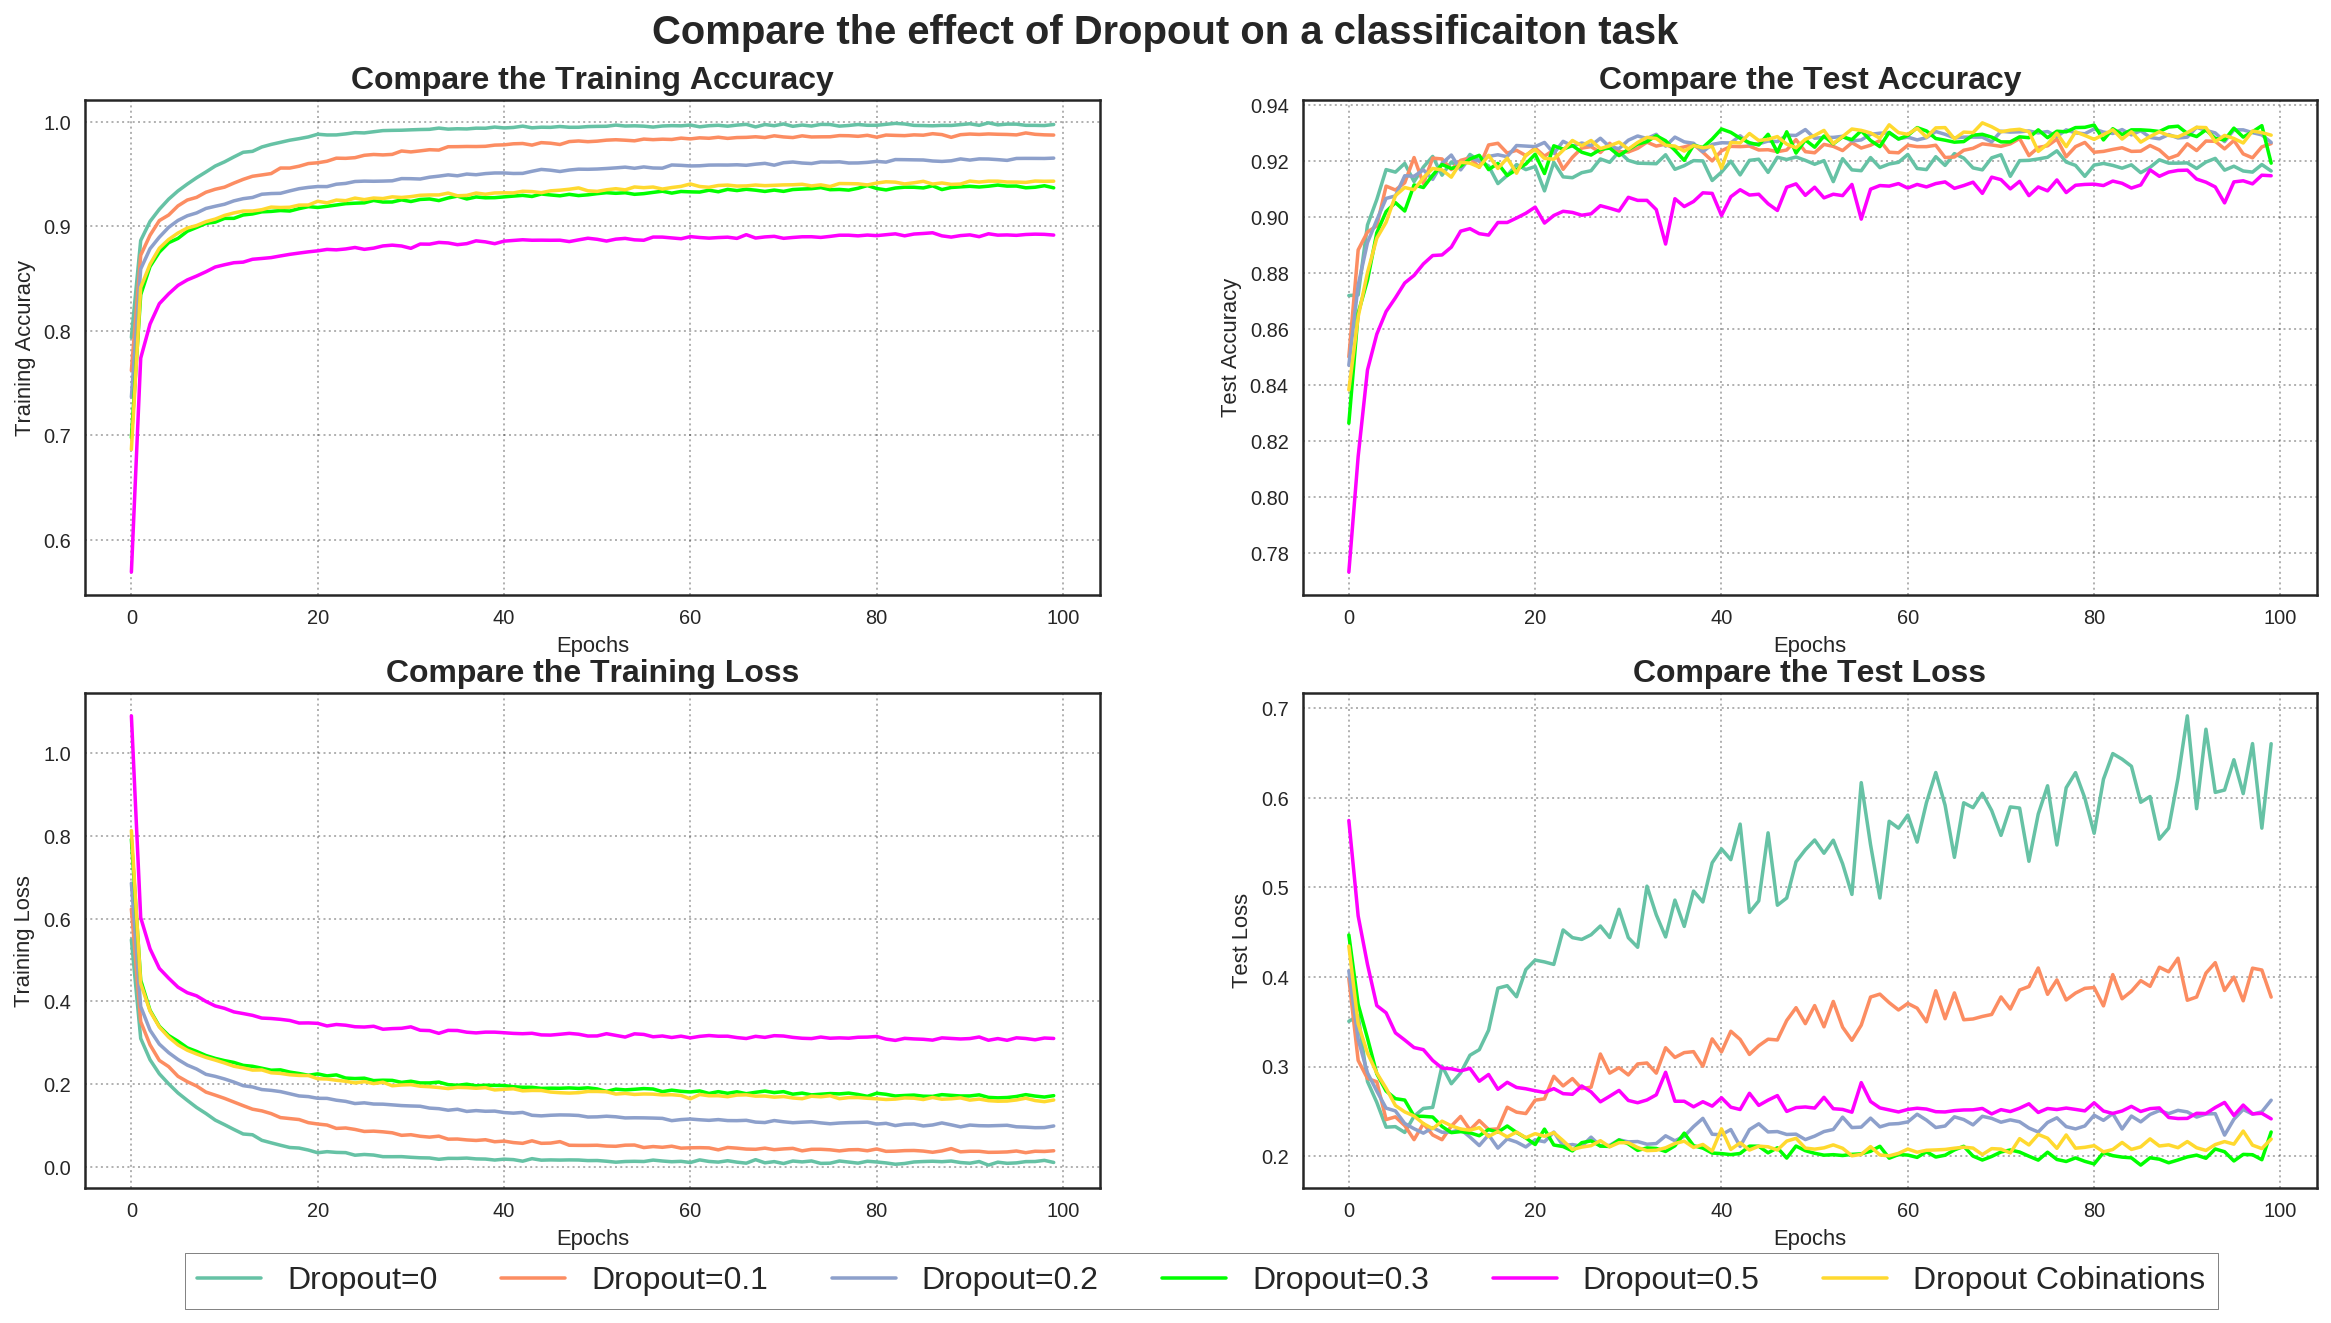

In [32]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
ax1.plot(model_1_history.history['acc'],color=colors[0],label='Dropout=0')
ax1.plot(model_2_history.history['acc'],color=colors[1],label='Dropout=0.1')
ax1.plot(model_3_history.history['acc'],color=colors[2],label='Dropout=0.2')
ax1.plot(model_4_history.history['acc'],color='lime',label='Dropout=0.3')
ax1.plot(model_5_history.history['acc'],color='fuchsia',label='Dropout=0.5')
ax1.plot(model_6_history.history['acc'],color=colors[5],label='Dropout Cobinations')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy',fontsize=16, fontweight='bold')


ax2.plot(model_1_history.history['val_acc'],color=colors[0],label='Dropout=0')
ax2.plot(model_2_history.history['val_acc'],color=colors[1],label='Dropout=0.1')
ax2.plot(model_3_history.history['val_acc'],color=colors[2],label='Dropout=0.2')
ax2.plot(model_4_history.history['val_acc'],color='lime',label='Dropout=0.3')
ax2.plot(model_5_history.history['val_acc'],color='fuchsia',label='Dropout=0.5')
ax2.plot(model_6_history.history['val_acc'],color=colors[5],label='Dropout Cobinations')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy',fontsize=16, fontweight='bold')


ax3.plot(model_1_history.history['loss'],color=colors[0],label='Dropout=0')
ax3.plot(model_2_history.history['loss'],color=colors[1],label='Dropout=0.1')
ax3.plot(model_3_history.history['loss'],color=colors[2],label='Dropout=0.2')
ax3.plot(model_4_history.history['loss'],color='lime',label='Dropout=0.3')
ax3.plot(model_5_history.history['loss'],color='fuchsia',label='Dropout=0.5')
ax3.plot(model_6_history.history['loss'],color=colors[5],label='Dropout Cobinations')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=16, fontweight='bold')


ax4.plot(model_1_history.history['val_loss'],color=colors[0],label='Dropout=0')
ax4.plot(model_2_history.history['val_loss'],color=colors[1],label='Dropout=0.1')
ax4.plot(model_3_history.history['val_loss'],color=colors[2],label='Dropout=0.2')
ax4.plot(model_4_history.history['val_loss'],color='lime',label='Dropout=0.3')
ax4.plot(model_5_history.history['val_loss'],color='fuchsia',label='Dropout=0.5')
ax4.plot(model_6_history.history['val_loss'],color=colors[5],label='Dropout Cobinations')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss',fontsize=16, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1),
          ncol=6, fancybox=False, shadow=False, frameon=True,edgecolor='black',fontsize=16)
fig.suptitle('Compare the effect of Dropout on a classificaiton task',fontsize=20, fontweight='bold',y=0.94)
plt.show()